In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  

In [88]:
path="E:\\Machine_learning_projects\\test\\data2.csv"
mydata=pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])

In [89]:
mydata.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [90]:
mydata.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [91]:
#rescaling data 
mydata=(mydata-mydata.mean())/mydata.std()
mydata.head(10)

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [92]:
#add ones columns
mydata.insert(0,'Ones',1)

In [93]:
mydata.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [94]:
#seperate x(training data) from y(target variable)
cols=mydata.shape[1]
X=mydata.iloc[:,:cols-1]
y=mydata.iloc[:,cols-1:cols]


In [95]:
print(X.shape)
print(X.head())

(47, 3)
   Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417


In [96]:
print(y.shape)
print(y.head())

(47, 1)
      Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389


In [97]:
#convert to matrix and initialize theta
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(np.array([0,0,0]))


In [98]:
X.shape

(47, 3)

In [99]:
#initialize the data for alpha(learning rate) and iterations
alpha=0.1
iters=100


In [100]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [101]:
def computeCost(X,y,theta):
    z=np.power(((X*theta.T)-y),2)
    print('z \n',z)
    print('m' ,len(X))
    return np.sum(z)/(2*len(X))
#print('computeCost(X,y,theta)=',computeCost(X,y,theta))

In [ ]:
g2,cost=gradientDescent(X, y, theta, alpha, iters)

In [103]:
 g2

matrix([[-1.10845139e-16,  8.79020847e-01, -4.74337322e-02]])

In [104]:
cost

array([0.40693147, 0.34617152, 0.30110291, 0.26742183, 0.24202804,
       0.22268634, 0.20778332, 0.19615275, 0.18695011, 0.17956245,
       0.17354364, 0.16856787, 0.1643961 , 0.16085209, 0.15780504,
       0.15515715, 0.15283462, 0.1507812 , 0.14895353, 0.14731772,
       0.14584693, 0.14451959, 0.14331811, 0.14222795, 0.14123687,
       0.14033451, 0.13951191, 0.13876131, 0.13807589, 0.13744961,
       0.13687711, 0.13635356, 0.13587464, 0.13543646, 0.13503547,
       0.13466846, 0.13433251, 0.13402498, 0.13374344, 0.13348567,
       0.13324967, 0.13303358, 0.13283572, 0.13265455, 0.13248866,
       0.13233675, 0.13219766, 0.13207029, 0.13195365, 0.13184685,
       0.13174905, 0.1316595 , 0.13157749, 0.1315024 , 0.13143363,
       0.13137066, 0.131313  , 0.1312602 , 0.13121184, 0.13116757,
       0.13112702, 0.13108989, 0.13105589, 0.13102476, 0.13099625,
       0.13097014, 0.13094623, 0.13092434, 0.1309043 , 0.13088594,
       0.13086913, 0.13085373, 0.13083964, 0.13082673, 0.13081

In [111]:
final_cost=cost.min()
print('the min cost =\n with theta = ',final_cost,g2)

the min cost =
 with theta =  0.1307006953901485 [[-1.10845139e-16  8.79020847e-01 -4.74337322e-02]]


x 
 [-1.44542274 -1.39933471 -1.35324669 -1.30715866 -1.26107063 -1.21498261
 -1.16889458 -1.12280656 -1.07671853 -1.0306305  -0.98454248 -0.93845445
 -0.89236643 -0.8462784  -0.80019038 -0.75410235 -0.70801432 -0.6619263
 -0.61583827 -0.56975025 -0.52366222 -0.47757419 -0.43148617 -0.38539814
 -0.33931012 -0.29322209 -0.24713406 -0.20104604 -0.15495801 -0.10886999
 -0.06278196 -0.01669394  0.02939409  0.07548212  0.12157014  0.16765817
  0.21374619  0.25983422  0.30592225  0.35201027  0.3980983   0.44418632
  0.49027435  0.53636238  0.5824504   0.62853843  0.67462645  0.72071448
  0.7668025   0.81289053  0.85897856  0.90506658  0.95115461  0.99724263
  1.04333066  1.08941869  1.13550671  1.18159474  1.22768276  1.27377079
  1.31985881  1.36594684  1.41203487  1.45812289  1.50421092  1.55029894
  1.59638697  1.642475    1.68856302  1.73465105  1.78073907  1.8268271
  1.87291513  1.91900315  1.96509118  2.0111792   2.05726723  2.10335525
  2.14944328  2.19553131  2.24161933  2.28770736 

Text(0.5, 1.0, 'Size vs. Price')

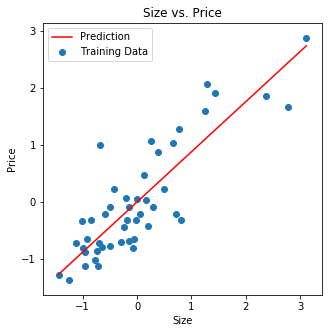

In [114]:
# get best fit line for Size vs. Price

x = np.linspace(mydata.Size.min(), mydata.Size.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)

# draw the line for Size vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(mydata.Size, mydata.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')


x 
 [-2.85185864 -2.79876402 -2.74566941 -2.69257479 -2.63948018 -2.58638556
 -2.53329095 -2.48019633 -2.42710172 -2.3740071  -2.32091249 -2.26781787
 -2.21472325 -2.16162864 -2.10853402 -2.05543941 -2.00234479 -1.94925018
 -1.89615556 -1.84306095 -1.78996633 -1.73687172 -1.6837771  -1.63068249
 -1.57758787 -1.52449326 -1.47139864 -1.41830403 -1.36520941 -1.3121148
 -1.25902018 -1.20592557 -1.15283095 -1.09973634 -1.04664172 -0.99354711
 -0.94045249 -0.88735788 -0.83426326 -0.78116865 -0.72807403 -0.67497942
 -0.6218848  -0.56879019 -0.51569557 -0.46260096 -0.40950634 -0.35641173
 -0.30331711 -0.25022249 -0.19712788 -0.14403326 -0.09093865 -0.03784403
  0.01525058  0.0683452   0.12143981  0.17453443  0.22762904  0.28072366
  0.33381827  0.38691289  0.4400075   0.49310212  0.54619673  0.59929135
  0.65238596  0.70548058  0.75857519  0.81166981  0.86476442  0.91785904
  0.97095365  1.02404827  1.07714288  1.1302375   1.18333211  1.23642673
  1.28952134  1.34261596  1.39571057  1.44880519

Text(0.5, 1.0, 'Bedrooms vs. Price')

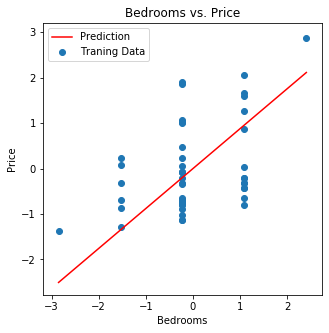

In [115]:

# get best fit line for Bedrooms vs. Price

x = np.linspace(mydata.Bedrooms.min(), mydata.Bedrooms.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)

# draw the line  for Bedrooms vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(mydata.Bedrooms,mydata.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Bedrooms vs. Price')


Text(0.5, 1.0, 'Error vs. Training Epoch')

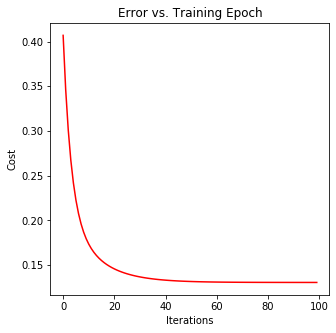

In [117]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
